In [1]:
%cd /Users/wangrixin/Desktop/LUAD/

/Users/wangrixin/Desktop/LUAD


In [2]:
%pip install gseapy

     |████████████████████████████████| 526 kB 5.8 MB/s            
     |████████████████████████████████| 63 kB 5.1 MB/s             
     |████████████████████████████████| 1.0 MB 11.9 MB/s            
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 306 kB 8.0 MB/s            
     |████████████████████████████████| 46 kB 4.8 MB/s             
     |████████████████████████████████| 47 kB 7.7 MB/s             
  Preparing metadata (setup.py) ... done
     |████████████████████████████████| 97 kB 7.3 MB/s             
     |████████████████████████████████| 4.5 MB 8.4 MB/s            
     |████████████████████████████████| 144 kB 12.0 MB/s            
     |████████████████████████████████| 138 kB 12.9 MB/s            
     |████████████████████████████████| 61 kB 11.8 MB/s            
     |████████████████████████████████| 1.8 MB 7.1 MB/s            
     |████████████████████████████████| 208 kB 12.6 MB/s            
     |████████████████████████

In [2]:
import pandas as pd
import os
import os.path as osp
import matplotlib.pyplot as plt
import numpy as np
import gseapy as gp

In [30]:
human = gp.get_library_name(organism='Human')
human

['ARCHS4_Cell-lines',
 'ARCHS4_IDG_Coexp',
 'ARCHS4_Kinases_Coexp',
 'ARCHS4_TFs_Coexp',
 'ARCHS4_Tissues',
 'Achilles_fitness_decrease',
 'Achilles_fitness_increase',
 'Aging_Perturbations_from_GEO_down',
 'Aging_Perturbations_from_GEO_up',
 'Allen_Brain_Atlas_10x_scRNA_2021',
 'Allen_Brain_Atlas_down',
 'Allen_Brain_Atlas_up',
 'Azimuth_Cell_Types_2021',
 'BioCarta_2013',
 'BioCarta_2015',
 'BioCarta_2016',
 'BioPlanet_2019',
 'BioPlex_2017',
 'CCLE_Proteomics_2020',
 'CORUM',
 'COVID-19_Related_Gene_Sets',
 'COVID-19_Related_Gene_Sets_2021',
 'Cancer_Cell_Line_Encyclopedia',
 'CellMarker_Augmented_2021',
 'ChEA_2013',
 'ChEA_2015',
 'ChEA_2016',
 'Chromosome_Location',
 'Chromosome_Location_hg19',
 'ClinVar_2019',
 'DSigDB',
 'Data_Acquisition_Method_Most_Popular_Genes',
 'DepMap_WG_CRISPR_Screens_Broad_CellLines_2019',
 'DepMap_WG_CRISPR_Screens_Sanger_CellLines_2019',
 'Descartes_Cell_Types_and_Tissue_2021',
 'DisGeNET',
 'Disease_Perturbations_from_GEO_down',
 'Disease_Perturbati

In [31]:
#over represent analysis
gene_list = pd.read_csv('/Users/wangrixin/Desktop/LUAD/Disgenet_gene_list.txt',header=None)
gene_sets = ['GO_Biological_Process_2021']
enr = gp.enrichr(gene_list,gene_sets,organism = 'Human',outdir = 'Disgenet_enrich')

In [28]:
help(gp.enrichr)

Help on function enrichr in module gseapy.enrichr:

enrichr(gene_list, gene_sets, organism='human', description='', outdir='Enrichr', background='hsapiens_gene_ensembl', cutoff=0.05, format='pdf', figsize=(8, 6), top_term=10, no_plot=False, verbose=False)
    Enrichr API.
    
    :param gene_list: str, list, tuple, series, dataframe. Also support input txt file with one gene id per row. 
                      The input `identifier` should be the same type to `gene_sets`.
    
    :param gene_sets: str, list, tuple of Enrichr Library name(s). 
                      or custom defined gene_sets (dict, or gmt file). 
                      
                      Examples: 
    
                      Input Enrichr Libraries (https://maayanlab.cloud/Enrichr/#stats):
                        str: 'KEGG_2016'
                        list: ['KEGG_2016','KEGG_2013']
                        Use comma to separate each other, e.g. "KEGG_2016,huMAP,GO_Biological_Process_2018"
    
                   

In [13]:
enr.results.head(5)

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
0,Reactome_2016,IRS-mediated signalling Homo sapiens R-HSA-112399,14/284,2.837171e-21,2.118447e-19,0,0,127.737037,6043.428200,MAP2K1;ARAF;BRAF;EGFR;STK11;NRAS;PIK3CA;ERBB2;...
1,Reactome_2016,Insulin receptor signalling cascade Homo sapie...,14/287,3.294485e-21,2.118447e-19,0,0,126.314103,5957.230390,MAP2K1;ARAF;BRAF;EGFR;STK11;NRAS;PIK3CA;ERBB2;...
2,Reactome_2016,IGF1R signaling cascade Homo sapiens R-HSA-242...,14/288,3.461514e-21,2.118447e-19,0,0,125.846715,5928.963548,MAP2K1;ARAF;BRAF;EGFR;STK11;NRAS;PIK3CA;ERBB2;...
3,Reactome_2016,Signaling by Type 1 Insulin-like Growth Factor...,14/288,3.461514e-21,2.118447e-19,0,0,125.846715,5928.963548,MAP2K1;ARAF;BRAF;EGFR;STK11;NRAS;PIK3CA;ERBB2;...
4,Reactome_2016,IRS-related events triggered by IGF1R Homo sap...,14/288,3.461514e-21,2.118447e-19,0,0,125.846715,5928.963548,MAP2K1;ARAF;BRAF;EGFR;STK11;NRAS;PIK3CA;ERBB2;...


In [14]:
from gseapy.plot import barplot, dotplot

In [17]:
help(dotplot)

Help on function dotplot in module gseapy.plot:

dotplot(df, column='Adjusted P-value', title='', cutoff=0.05, top_term=10, sizes=None, norm=None, legend=True, figsize=(6, 5.5), cmap='RdBu_r', ofname=None, **kwargs)
    Visualize enrichr results.
    
    :param df: GSEApy DataFrame results.
    :param column: which column of DataFrame to show. Default: Adjusted P-value
    :param title: figure title
    :param cutoff: terms with 'column' value < cut-off are shown.
    :param top_term: number of enriched terms to show.
    :param ascending: bool, the order of y axis.
    :param sizes: tuple, (min, max) scatter size. Not functional for now
    :param norm: maplotlib.colors.Normalize object.
    :param legend: bool, whether to show legend.
    :param figsize: tuple, figure size. 
    :param cmap: matplotlib colormap
    :param ofname: output file name. If None, don't save figure



<AxesSubplot:title={'center':'Reactome_2016'}, xlabel='-log$_{10}$(Adjusted P-value)'>

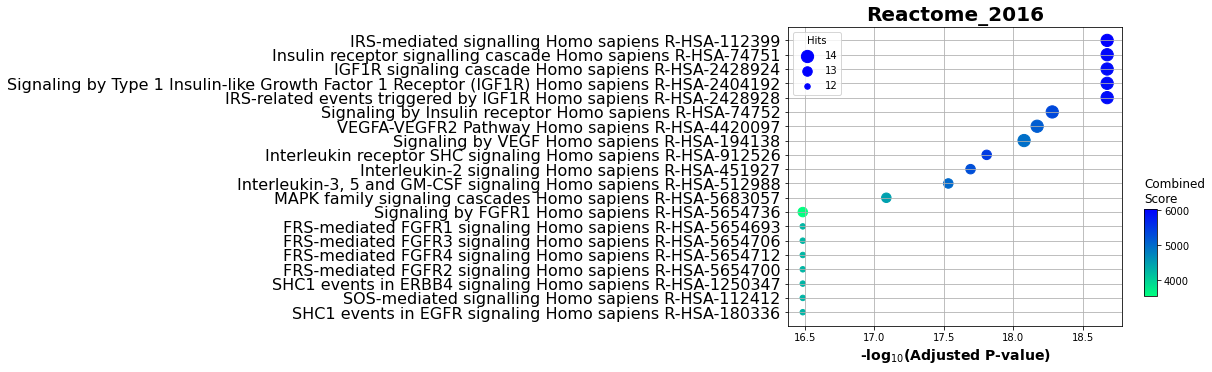

In [24]:
dotplot(enr.res2d, column='Adjusted P-value',title='Reactome_2016',cutoff=0.05,top_term = 20, cmap='winter_r')

In [267]:
gene_list = pd.read_excel('/Users/wangrixin/Desktop/gene.xlsx',header=None)

In [268]:
gene_list

,0
0,ROS1
1,BRAF
2,ERBB2
3,FGFR2
4,KRAS
5,FGFR3
6,PIK3CA
7,ARAF
8,ALK


In [11]:
ppi = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/3_protein_to_protein.tsv',sep='\t')

In [12]:
ppi.head()

,node_1,node_2,node_1_type,node_2_type,node_1_name,node_2_name
0,6416,2318,protein,protein,MAP2K4,FLNC
1,6416,9043,protein,protein,MAP2K4,SPAG9
2,6416,5599,protein,protein,MAP2K4,MAPK8
3,6416,5871,protein,protein,MAP2K4,MAP4K2
4,6416,1326,protein,protein,MAP2K4,MAP3K8


In [14]:
#generate ppi data from original protein_to_protein.tsv, only remain rows whose node_1_name and node_2_name appear in disgenet genes
ppi_disgenet = pd.DataFrame(columns=ppi.columns)
for i in range(len(ppi)):
    entry = ppi.loc[i]
    if entry['node_1_name'] in gene_list[0].tolist() and entry['node_2_name'] in gene_list[0].tolist():
        ppi_disgenet = ppi_disgenet.append(entry)
ppi_disgenet

,node_1,node_2,node_1_type,node_2_type,node_1_name,node_2_name
9656,1499,324,protein,protein,CTNNB1,APC
9667,1499,1956,protein,protein,CTNNB1,EGFR
9674,1499,2064,protein,protein,CTNNB1,ERBB2
10015,1499,3845,protein,protein,CTNNB1,KRAS
10032,1499,5290,protein,protein,CTNNB1,PIK3CA
10236,1499,4609,protein,protein,CTNNB1,MYC
10240,1499,3265,protein,protein,CTNNB1,HRAS
10272,1499,4893,protein,protein,CTNNB1,NRAS
10311,1499,6654,protein,protein,CTNNB1,SOS1
18673,1956,6654,protein,protein,EGFR,SOS1


In [15]:
len(ppi_disgenet)

60

In [16]:
outdir = osp.join('ppi')
os.makedirs(outdir, exist_ok = True)
ppi_disgenet.to_csv(osp.join(outdir, 'ppi_disgenet.csv'))

In [124]:
#validation to see if the ppi generated is correct
#positive control--making node_1_name to KRAS
temp = ppi[ppi['node_1_name']=='ALK']['node_2_name'].tolist()
exsit = []
for i in range(len(temp)):
    gene = temp[i]
    if gene in gene_list[0].tolist():
        gene = str(gene)
        exsit.append(gene)
exsit

#construct a dictionary, biological process as keys and genes as values.

In [208]:
pathway_enrich = pd.read_csv('/Users/wangrixin/Desktop/LUAD/Active_pathways/enriched_pathways.csv')
pathway_enrich

,term.id,term.name,adjusted.p.val,term.size,overlap,evidence,Genes_RNAseq,Genes_Survival
0,GOBP_MAPK_CASCADE,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,9.296624e-07,792,ROS1|BRAF|ERBB2|FGFR2|KRAS|FGFR3|NRAS|ARAF|ALK,RNAseq,ROS1|BRAF|ERBB2|FGFR2|KRAS|FGFR3|ARAF,NaN
1,GOBP_POSITIVE_REGULATION_OF_PROTEIN_PHOSPHORYL...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,1.288665e-02,726,BRAF|ERBB2|KRAS|FGFR3|PIK3CA|ARAF,RNAseq,BRAF|ERBB2|KRAS|FGFR3|PIK3CA|ARAF|STK11,NaN
2,GOBP_ENZYME_LINKED_RECEPTOR_PROTEIN_SIGNALING_...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,2.518763e-04,984,ROS1|BRAF|ERBB2|FGFR2|APC|FGFR3|PIK3CA|ALK,RNAseq,ROS1|BRAF|ERBB2|FGFR2|APC|FGFR3|PIK3CA|STK11,NaN
3,GOBP_TRANSMEMBRANE_RECEPTOR_PROTEIN_TYROSINE_K...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,7.917588e-06,634,ROS1|BRAF|ERBB2|FGFR2|APC|FGFR3|PIK3CA|ALK,RNAseq,ROS1|BRAF|ERBB2|FGFR2|APC|FGFR3|PIK3CA,NaN
4,GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PR...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,3.091221e-02,959,ERBB2|FGFR2|KRAS|FGFR3|PIK3CA|NRAS,combined,NaN,NaN
5,GOBP_POSITIVE_REGULATION_OF_PHOSPHORUS_METABOL...,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,2.550819e-06,887,ROS1|BRAF|ERBB2|FGFR2|KRAS|FGFR3|PIK3CA|ARAF|ALK,RNAseq,ROS1|BRAF|ERBB2|FGFR2|KRAS|FGFR3|PIK3CA|ARAF|S...,NaN
6,GOBP_PEPTIDYL_TYROSINE_MODIFICATION,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,2.151914e-02,377,ROS1|ERBB2|FGFR2|FGFR3|ALK,combined,NaN,NaN
7,GOBP_POSITIVE_REGULATION_OF_KINASE_ACTIVITY,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,2.132606e-03,477,ROS1|ERBB2|FGFR2|FGFR3|PIK3CA|ALK,RNAseq,ROS1|ERBB2|FGFR2|FGFR3|PIK3CA|STK11,NaN
8,GOBP_REGULATION_OF_TRANSFERASE_ACTIVITY,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,3.506844e-03,888,ROS1|ERBB2|FGFR2|APC|FGFR3|PIK3CA|ALK,RNAseq,ROS1|ERBB2|FGFR2|APC|FGFR3|PIK3CA|STK11,NaN
9,GOBP_POSITIVE_REGULATION_OF_TRANSFERASE_ACTIVITY,http://www.gsea-msigdb.org/gsea/msigdb/cards/G...,5.647320e-03,563,ROS1|ERBB2|FGFR2|FGFR3|PIK3CA|ALK,RNAseq,ROS1|ERBB2|FGFR2|FGFR3|PIK3CA|STK11,NaN


In [209]:
dict_pathway_gene = {}
for i in range(len(pathway_enrich)):
    entry = pathway_enrich.loc[i]
    pathway = str(entry['term.id'])
    gene_list = str(entry['overlap'])
    dict_pathway_gene[pathway] = gene_list.split('|')
dict_pathway_gene

{'GOBP_MAPK_CASCADE': ['ROS1',
  'BRAF',
  'ERBB2',
  'FGFR2',
  'KRAS',
  'FGFR3',
  'NRAS',
  'ARAF',
  'ALK'],
 'GOBP_POSITIVE_REGULATION_OF_PROTEIN_PHOSPHORYLATION': ['BRAF',
  'ERBB2',
  'KRAS',
  'FGFR3',
  'PIK3CA',
  'ARAF'],
 'GOBP_ENZYME_LINKED_RECEPTOR_PROTEIN_SIGNALING_PATHWAY': ['ROS1',
  'BRAF',
  'ERBB2',
  'FGFR2',
  'APC',
  'FGFR3',
  'PIK3CA',
  'ALK'],
 'GOBP_TRANSMEMBRANE_RECEPTOR_PROTEIN_TYROSINE_KINASE_SIGNALING_PATHWAY': ['ROS1',
  'BRAF',
  'ERBB2',
  'FGFR2',
  'APC',
  'FGFR3',
  'PIK3CA',
  'ALK'],
 'GOBP_POSITIVE_REGULATION_OF_CELL_POPULATION_PROLIFERATION': ['ERBB2',
  'FGFR2',
  'KRAS',
  'FGFR3',
  'PIK3CA',
  'NRAS'],
 'GOBP_POSITIVE_REGULATION_OF_PHOSPHORUS_METABOLIC_PROCESS': ['ROS1',
  'BRAF',
  'ERBB2',
  'FGFR2',
  'KRAS',
  'FGFR3',
  'PIK3CA',
  'ARAF',
  'ALK'],
 'GOBP_PEPTIDYL_TYROSINE_MODIFICATION': ['ROS1',
  'ERBB2',
  'FGFR2',
  'FGFR3',
  'ALK'],
 'GOBP_POSITIVE_REGULATION_OF_KINASE_ACTIVITY': ['ROS1',
  'ERBB2',
  'FGFR2',
  'FGFR3',
  'P

In [210]:
row = []
for pathway in dict_pathway_gene.keys():
    pathway = str(pathway)
    gene_list = dict_pathway_gene[pathway]
    for gene in gene_list:
        gene = str(gene)
        row.append([pathway,gene])
df_pathway_gene = pd.DataFrame(row,columns=['Pathway','Gene'])
df_pathway_gene

,Pathway,Gene
0,GOBP_MAPK_CASCADE,ROS1
1,GOBP_MAPK_CASCADE,BRAF
2,GOBP_MAPK_CASCADE,ERBB2
3,GOBP_MAPK_CASCADE,FGFR2
4,GOBP_MAPK_CASCADE,KRAS
...,...,...
77,GOBP_POSITIVE_REGULATION_OF_INTRACELLULAR_SIGN...,FGFR2
78,GOBP_POSITIVE_REGULATION_OF_INTRACELLULAR_SIGN...,KRAS
79,GOBP_POSITIVE_REGULATION_OF_INTRACELLULAR_SIGN...,FGFR3
80,GOBP_POSITIVE_REGULATION_OF_INTRACELLULAR_SIGN...,PIK3CA


In [272]:
#validation
df_pathway_gene[df_pathway_gene['Pathway']=='GOBP_MAPK_CASCADE']['Gene']

0     ROS1
1     BRAF
2    ERBB2
3    FGFR2
4     KRAS
5    FGFR3
6     NRAS
7     ARAF
8      ALK
Name: Gene, dtype: object

In [211]:
df_pathway_gene.to_excel(osp.join(outdir,'Active_pathways_pathway_genes.xlsx'))

Extract protein_to_biological_fuction from 4_protein_to_biological_function.tsv

In [5]:
biological_process = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Raw_data/4_protein_to_biological_function.tsv',sep='\t')

In [13]:
gene_list = pd.read_csv('/Users/wangrixin/Desktop/LUAD/Disgenet_gene_list.txt',header=None)

In [7]:
biological_process.head()

,node_1,node_2,node_1_type,node_2_type,node_1_name,node_2_name
0,1890,GO:0000002,protein,biological_function,TYMP,mitochondrial genome maintenance
1,4358,GO:0000002,protein,biological_function,MPV17,mitochondrial genome maintenance
2,4976,GO:0000002,protein,biological_function,OPA1,mitochondrial genome maintenance
3,10000,GO:0000002,protein,biological_function,AKT3,mitochondrial genome maintenance
4,55186,GO:0000002,protein,biological_function,SLC25A36,mitochondrial genome maintenance


In [8]:
#protein-biological-process = pbi
pbi_disgenet = pd.DataFrame(columns=biological_process.columns)
for i in range(len(biological_process)):
    entry = biological_process.loc[i]
    if entry['node_1_name'] in gene_list[0].tolist():
        pbi_disgenet = pbi_disgenet.append(entry)
pbi_disgenet

,node_1,node_2,node_1_type,node_2_type,node_1_name,node_2_name
312,324,GO:0006974,protein,biological_function,APC,cellular response to DNA damage stimulus
338,4609,GO:0006974,protein,biological_function,MYC,cellular response to DNA damage stimulus
350,6794,GO:0006974,protein,biological_function,STK11,cellular response to DNA damage stimulus
746,4609,GO:0000122,protein,biological_function,MYC,negative regulation of transcription by RNA po...
1130,1499,GO:0045892,protein,biological_function,CTNNB1,"negative regulation of transcription, DNA-temp..."
...,...,...,...,...,...,...
34184,1499,GO:2000008,protein,biological_function,CTNNB1,regulation of protein localization to cell sur...
34307,3265,GO:2000251,protein,biological_function,HRAS,positive regulation of actin cytoskeleton reor...
34320,8626,GO:2000271,protein,biological_function,TP63,positive regulation of fibroblast apoptotic pr...
34521,3265,GO:2000630,protein,biological_function,HRAS,positive regulation of miRNA metabolic process


In [9]:
%pwd

'/Users/wangrixin/Desktop/LUAD'

In [10]:
outdir2 = osp.join('pbi')
os.makedirs(outdir2, exist_ok = True)
pbi_disgenet.to_csv(osp.join(outdir2, 'pbi_disgenet.csv'))

In [205]:
len(gene_list)

22

In [163]:
'HRAS' in gene_list[0].tolist()

True

In [19]:
protein_fm = pd.read_csv('/Users/wangrixin/Desktop/Project1/Data/Generated_data/1_drug_to_protein.tsv',sep='\t')

In [20]:
protein_fm.head()

,node_1,node_2,node_1_type,node_2_type,node_1_name,node_2_name
0,FDB022665,1160,drug,protein,Phosphocreatine,CKMT2
1,FDB022665,1152,drug,protein,Phosphocreatine,CKB
2,FDB022665,2593,drug,protein,Phosphocreatine,GAMT
3,FDB022665,1158,drug,protein,Phosphocreatine,CKM
4,FDB022665,548596,drug,protein,Phosphocreatine,CKMT1A


In [17]:
fm_list = pd.read_excel('/Users/wangrixin/Desktop/fm_list.xlsx',header=None)

In [18]:
fm_list[0]

0    FDB027560
1    FDB000351
2    FDB013265
3    FDB024083
4    FDB011663
5    FDB030683
6    FDB002788
7    FDB011854
8    FDB003243
9    FDB004659
Name: 0, dtype: object

In [23]:
pfi_disgenet = pd.DataFrame(columns=protein_fm.columns)
for i in range(len(protein_fm)):
    entry = protein_fm.loc[i]
    if entry['node_1'] in fm_list[0].tolist() and entry['node_2_name'] in gene_list[0].tolist():
        pfi_disgenet = pfi_disgenet.append(entry)
pfi_disgenet

,node_1,node_2,node_1_type,node_2_type,node_1_name,node_2_name
1708,FDB003243,3265,drug,protein,Ethyl carbamate,HRAS
11776,FDB030683,238,drug,protein,ATP,ALK
12049,FDB030683,6794,drug,protein,ATP,STK11
12050,FDB030683,324,drug,protein,ATP,APC
12203,FDB030683,1499,drug,protein,ATP,CTNNB1
12317,FDB030683,6098,drug,protein,ATP,ROS1
12356,FDB030683,2263,drug,protein,ATP,FGFR2
13107,FDB030683,5290,drug,protein,ATP,PIK3CA
13229,FDB030683,5894,drug,protein,ATP,RAF1
13317,FDB030683,6654,drug,protein,ATP,SOS1


In [24]:
outdir3 = osp.join('pfi')
os.makedirs(outdir3, exist_ok = True)
pfi_disgenet.to_csv(osp.join(outdir3, 'pfi_disgenet.csv'))

In [186]:
weights = pd.read_excel('/Users/wangrixin/Desktop/weights.xlsx')

In [199]:
weights.head()
len(weights)

29559

In [191]:
len(weights[0][0].split('\n'))

7

In [194]:
protein_weight = []
for i in range(len(weights)):
    entry = weights.loc[i]
    pairs = entry[0].split('\n')
    for pair in pairs:
        protein_weight.append(pair)
protein_weight

['  (0, 7)\t0.14285714285714288',
 '  (0, 6)\t0.14285714285714288',
 '  (0, 5)\t0.14285714285714288',
 '  (0, 4)\t0.14285714285714288',
 '  (0, 3)\t0.14285714285714288',
 '  (0, 2)\t0.14285714285714288',
 '  (0, 1)\t0.14285714285714288',
 '  (0, 14328)\t0.03854790053377829',
 '  (0, 13910)\t0.03854790053377829',
 '  (0, 13096)\t0.03854790053377829',
 '  (0, 11491)\t0.03854790053377829',
 '  (0, 11323)\t0.03854790053377829',
 '  (0, 11172)\t0.03854790053377829',
 '  (0, 9972)\t0.06025449885618935',
 '  (0, 9723)\t0.06025449885618935',
 '  (0, 8538)\t0.06025449885618935',
 '  (0, 7981)\t0.03854790053377829',
 '  (0, 7911)\t0.06025449885618935',
 '  (0, 6567)\t0.03854790053377829',
 '  (0, 5984)\t0.06025449885618935',
 '  (0, 5187)\t0.03854790053377829',
 '  (0, 4715)\t0.06025449885618935',
 '  (0, 3605)\t0.03854790053377829',
 '  (0, 1492)\t0.03854790053377829',
 '  (0, 1491)\t0.03854790053377829',
 '  (0, 5)\t0.03854790053377829',
 '  (0, 4)\t0.03854790053377829',
 '  (0, 3)\t0.03854790

In [195]:
len(protein_weight)

545152

In [196]:
protein_weight = pd.DataFrame(protein_weight)

In [198]:
outdir4 = osp.join('weights')
os.makedirs(outdir4, exist_ok = True)
protein_weight.to_excel(osp.join(outdir4, 'protein_weights.xlsx'))